## Trees: Ensemble Methods - Boosting

Boosting is another ensemble technique to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) at every step,and the goal is to solve for net error from the prior tree.

When an input is misclassified by a hypothesis, its weight is increased so that next hypothesis is more likely to classify it correctly. By combining the whole set at the end converts weak learners into a better performing model.

An ensemble of trees are built one by one and individual trees are summed sequentially. The Next tree tries to recover the loss (difference between actual and predicted values) from the previous tree.

 - boosting = low variance, high bias base learners
 
 ![Boosting Example](./images/boosting.png)

#### Adaboost = Adaptive Boosting
AdaBoost learns from the mistakes by increasing the weight of misclassified data points.

It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights to incorrectly classified instances.

*Adaboost usually has just a node and two leaves.(A tree with one node and two leaves is called a stump)*

Steps:
<li> 0: Initialize the weights of data points. (e.g. data has 1000 points, each initial point would have 1/1000 = 0.001) </li>
<li> 1: Train a decision Tree (whole dataset) </li>
<li> 2: Calculate the weighted error rate (e) of the decision tree. </li>
<li> 3: Calculate this decision tree’s weight in the ensemble. The weight of this tree = learning rate * log( (1 — e) / e) </li> 
<br> ** The higher the weighted error of the tree, the less decision power the tree will be given during the later voting. </br>
<br> ** The lower the weighted error of the tree, the higher decision power the tree will be given during the later voting. </br>

<li> 4: Update weights of wrongly classified points. </li> 
<br> the weight of each data point stays same if the model got this data points correct.</br>
<br> the <strong><em>new weight of this data point = old weight*exp(weight of the tree)</em></strong>, if the model got this data point wrong </br> 

![sample weight calculation](./images/sample_weight_calc.png)

** The amount of say (alpha) will be negative when the sample is correctly classified.

** The amount of say (alpha) will be positive when the sample is miss-classified.

--- We normalize weights to bring them all to the sum of one afterwards.

<li> 5: Repeat step 1 (dataset with new weights) </li>
<li> 6: Make final prediction </li>

Further reading:https://www.mygreatlearning.com/blog/adaboost-algorithm/
<br> https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/#:~:text=AdaBoost%20also%20called%20Adaptive%20Boosting,are%20also%20called%20Decision%20Stumps </br>

#### Gradient Boosting = Gradient Descent + Boosting.
Gradient Descent is a first-order iterative optimization algorithm for finding a local minimum of a differential function. If x(n+1) = x(n) - learning_rate*dF/dx(n) for a small learning_rate, then F(x(n)) => F(x(n+1)). (the idea is to move against the gradient).

Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of changing the weights for every incorrect classified observation at every iteration like AdaBoost, Gradient Boosting method tries to fit the new predictor to the residual errors made by the previous predictor.

Say we have mean squared error (MSE) as loss defined as:
![Mean squared error](./images/xgb_1.png)

We want our predictions, such that our loss function (MSE) is minimum. By using gradient descent and updating our predictions based on a learning rate, we can find the values where MSE is minimum.
![gradient boosting](./images/xgb_2.png)

So, we are basically updating the predictions such that the sum of our residuals is close to 0 (or minimum) and predicted values are sufficiently close to actual values.

<strong>Note:</strong>

<li> Gradient Boosting is prone to Over-fitting.</li>
<li> Requires careful tuning of different hyper-parameters.</li>

Example: https://towardsdatascience.com/machine-learning-part-18-boosting-algorithms-gradient-boosting-in-python-ef5ae6965be4

In [1]:
#import libraries
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import catboost as cb
import lightgbm as lgb

In [2]:
#import dataset

X,y = load_boston(return_X_y=True)

#train,test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#xgboost
xgbr = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=100,n_jobs=-1)
start_time = time.time()  #track the model development time

xgbr.fit(X_train,y_train)

end_time = time.time()

y_predict = xgbr.predict(X_test)

print("--- %s seconds ---" % (end_time - start_time)) 

mean_squared_error(y_test,y_predict) #error

[06:55:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--- 0.05968928337097168 seconds ---


6.583590106471756

In [3]:
#lets try lightgbm
#it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise.

lgbr = lgb.LGBMRegressor(learning_rate=0.1,n_estimators=100,max_depth=5,num_leaves=50)

start_time = time.time()

lgbr.fit(X_train,y_train,verbose=0)

end_time = time.time()

y_predict = lgbr.predict(X_test)

print("--- %s seconds ---" % (end_time - start_time))

mean_squared_error(y_test,y_predict)    #error

--- 0.09108877182006836 seconds ---


8.069578290965865

In [4]:
#catboost helps you savetime by preprocessing of categorical columns for you.
#weighted sampling version of Stochastic Gradient Boosting.

#lets try catboost
cbr = cb.CatBoostRegressor(learning_rate=0.1,n_estimators=100,max_depth=5)

start_time = time.time()

cbr.fit(X_train,y_train,verbose=0)

end_time = time.time()

y_predict = cbr.predict(X_test)

print("--- %s seconds ---" % (end_time - start_time))

mean_squared_error(y_test,y_predict)    #error

--- 0.19351601600646973 seconds ---


9.344821856482579

Exercise: Load the promotion dataset from the data folder, train a model on the dataset and compare results using both random forests and gradient boosting.

<strong>Note: Also make sure to do some data cleaning, upsampling/downsampling, parameter tuning.</strong>

`n_estimators`
- increasing num trees will increase model complexity

`max_features`
- how many features to split on
- rule of thumb = sqrt(num_features)
- depends on ratio of noisy to important var in dataset
- small num features = reduce variance increase bias
- lots of noisy = small m will decrease probability of choosing an important variable at a split

`min samples per leaf` 
- increase a bit (default is 1) to get smaller trees w less overfitting

`max_depth`
- controls variance

`subsample`
- The fraction of observations to be selected for each tree. Selection is done by random sampling.
- Values slightly less than 1 make the model robust by reducing the variance.



## Starting point hyperparameters

*** Heard from a Kaggle Grandmaster

Learning rate = 0.05, 1000 rounds, max depth = 3-5, subsample = 0.8-1.0, colsample_bytree = 0.3 - 0.8, lambda = 0 to 5

Add capacity to combat bias - add rounds

Reduce capacity to combat variance - depth / regularization

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix

In [131]:
df = pd.read_csv('./data/promotion/train.csv')
df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [132]:
set(df.duplicated())

{False}

In [133]:
len(df.EmployeeNo.unique())

38312

In [134]:
len(df.Division.unique())

9

In [135]:
len(df.Qualification.unique())

4

In [136]:
len(df.Channel_of_Recruitment.unique())

3

In [137]:
type(df.Year_of_recruitment[1])

numpy.int64

In [138]:
df['age'] = 2022 - df.Year_of_birth

df['number_of_service_years'] = 2022 - df.Year_of_recruitment


In [139]:
df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,age,number_of_service_years
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,...,41,ANAMBRA,No,Married,No,No,0,0,36,11
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,...,52,ANAMBRA,Yes,Married,No,No,0,0,31,7
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,...,42,KATSINA,Yes,Married,No,No,0,0,35,10
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,...,42,NIGER,Yes,Single,No,No,1,0,40,13
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,...,77,AKWA IBOM,Yes,Married,No,No,1,0,32,10


In [140]:
df = df.drop(['EmployeeNo', 'Year_of_birth', 'Year_of_recruitment'], axis=1)


In [141]:
# df.replace({'A': , 'B': 5}, 100)

In [143]:
df = df.replace({'More than 5': 6, 'Not_sure': 'Single'})

In [144]:
le = LabelEncoder()  #instantiate the Label Encoder
df['Division'] = le.fit_transform(df['Division'])
df['Qualification'] = le.fit_transform(df['Qualification'])
df['Channel_of_Recruitment'] = le.fit_transform(df['Channel_of_Recruitment'])
df['State_Of_Origin'] = le.fit_transform(df['State_Of_Origin'])
df['Foreign_schooled'] = le.fit_transform(df['Foreign_schooled'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df['Past_Disciplinary_Action'] = le.fit_transform(df['Past_Disciplinary_Action'])
df['Previous_IntraDepartmental_Movement'] = le.fit_transform(df['Previous_IntraDepartmental_Movement'])
df['Gender'] = le.fit_transform(df['Gender'])





In [145]:
# int(df.No_of_previous_employers)

In [146]:
df.describe()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Promoted_or_Not,age,number_of_service_years
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,3.016992,0.435321,0.701608,0.464867,2.253680,7.698959,0.352996,0.023152,55.366465,19.072144,0.913421,0.371085,0.003941,0.094044,0.084595,35.790666,8.860305
std,2.425502,0.734417,0.457558,0.539401,0.609443,3.744135,0.477908,0.150388,13.362741,9.608703,0.281220,0.771367,0.062657,0.291893,0.278282,7.646047,4.261451
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,4.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,43.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,6.000000
50%,2.000000,0.000000,1.000000,0.000000,2.000000,7.500000,0.000000,0.000000,52.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34.000000,8.000000
75%,4.000000,1.000000,1.000000,1.000000,2.000000,10.000000,1.000000,0.000000,68.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,10.000000
max,8.000000,3.000000,1.000000,2.000000,11.000000,12.500000,1.000000,1.000000,91.000000,36.000000,1.000000,2.000000,1.000000,1.000000,1.000000,72.000000,40.000000


In [147]:
y = df.Promoted_or_Not	

In [148]:
X= df.drop('Promoted_or_Not', axis = 1)

In [149]:
#train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

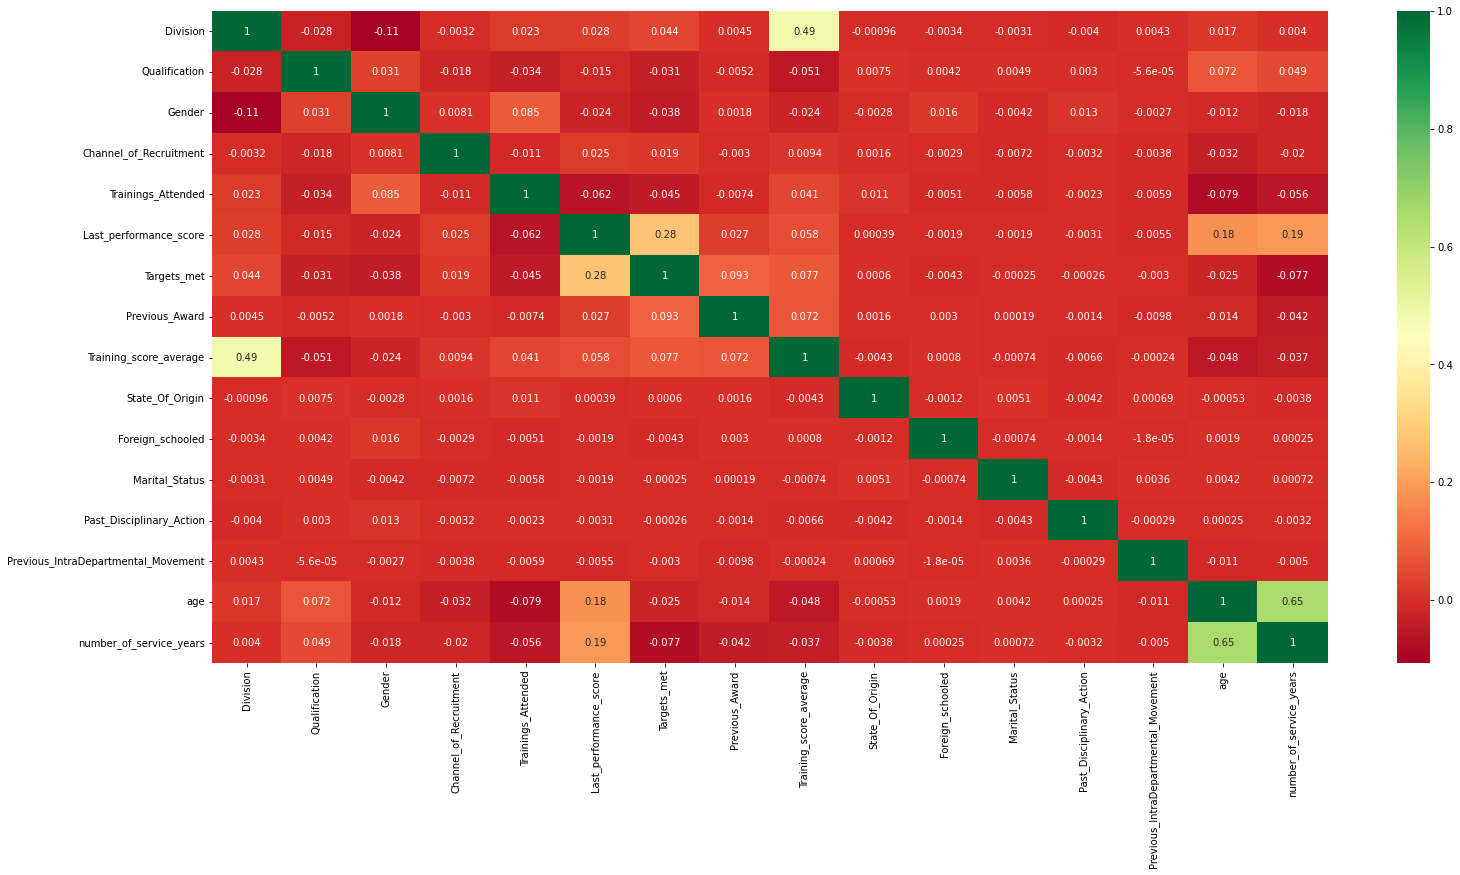

In [150]:
#get correlations of each features in dataset
corrmat = X.corr()   #get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [151]:
#initialize the decisiontreeclassifier
dtc = tree.DecisionTreeClassifier(max_depth=5,random_state=42,criterion='entropy')
#criterion is the function to measure the quality of a split.
#fit and return f1_score
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
# f1_score(y_test,,average=None)
f1_score(y_test, y_pred, average = 'macro')

0.5902465026462965

In [156]:
#random forest with gini
rf = RandomForestClassifier(criterion='entropy',n_estimators=15, n_jobs=-1)

rf.fit(X_train,y_train)  #fit on the data

rf_predict = rf.predict(X_test)

f1_score(y_test, rf_predict, average='macro')

0.6830883231982176

In [157]:
df.Promoted_or_Not.value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [165]:
from sklearn.utils import resample

df_promoted = df[df.Promoted_or_Not==1]
df_not_promoted = df[df.Promoted_or_Not==0]

In [167]:
df_upsample = resample(df_promoted, random_state=42, n_samples=df_not_promoted.shape[0])

In [168]:
df.upsample.shape

AttributeError: 'DataFrame' object has no attribute 'upsample'